In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [2]:
df = pd.read_excel('../data_processed/men_women_activists.xlsx')

In [3]:

df.loc[df['gender'] == 'female', 'sex'] = 0
df.loc[df['gender'] == 'male', 'sex'] = 1

X = df[['sex']]  
y = df['label']  
# Add a constant term to the predictor variables
X = sm.add_constant(X)
# Fit the logistic regression model
model = sm.Logit(y, X).fit()
# Print the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.666068
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                52246
Model:                          Logit   Df Residuals:                    52244
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 May 2023   Pseudo R-squ.:               0.0002533
Time:                        20:54:08   Log-Likelihood:                -34799.
converged:                       True   LL-Null:                       -34808.
Covariance Type:            nonrobust   LLR p-value:                 2.681e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4438      0.011    -40.418      0.000      -0.465      -0.422
sex           -0.0803      0.

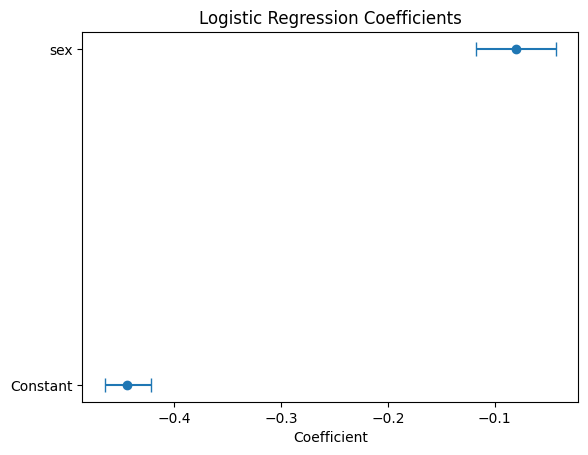

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with the coefficients and their confidence intervals
data = {
    'Coefficient': [-0.4438, -0.0803],
    'Std Error': [0.011, 0.019],
    'Lower CI': [-0.465, -0.118],
    'Upper CI': [-0.422, -0.043]
}

df_coeff = pd.DataFrame(data, index=['Constant', 'sex'])

# Calculate the error lengths for plotting
error_lengths = np.abs(df_coeff[['Lower CI', 'Upper CI']].values.T - df_coeff['Coefficient'].values)

# Plot the coefficients and their confidence intervals
fig, ax = plt.subplots()
ax.errorbar(df_coeff['Coefficient'], df_coeff.index, xerr=error_lengths, fmt='o', capsize=5)
ax.set_xlabel('Coefficient')
ax.set_title('Logistic Regression Coefficients')
plt.show()
